# Import Package

In [17]:
# import package
import pandas as pd
import numpy as np
from luwiji.recommendation_system import illustration

# How it works

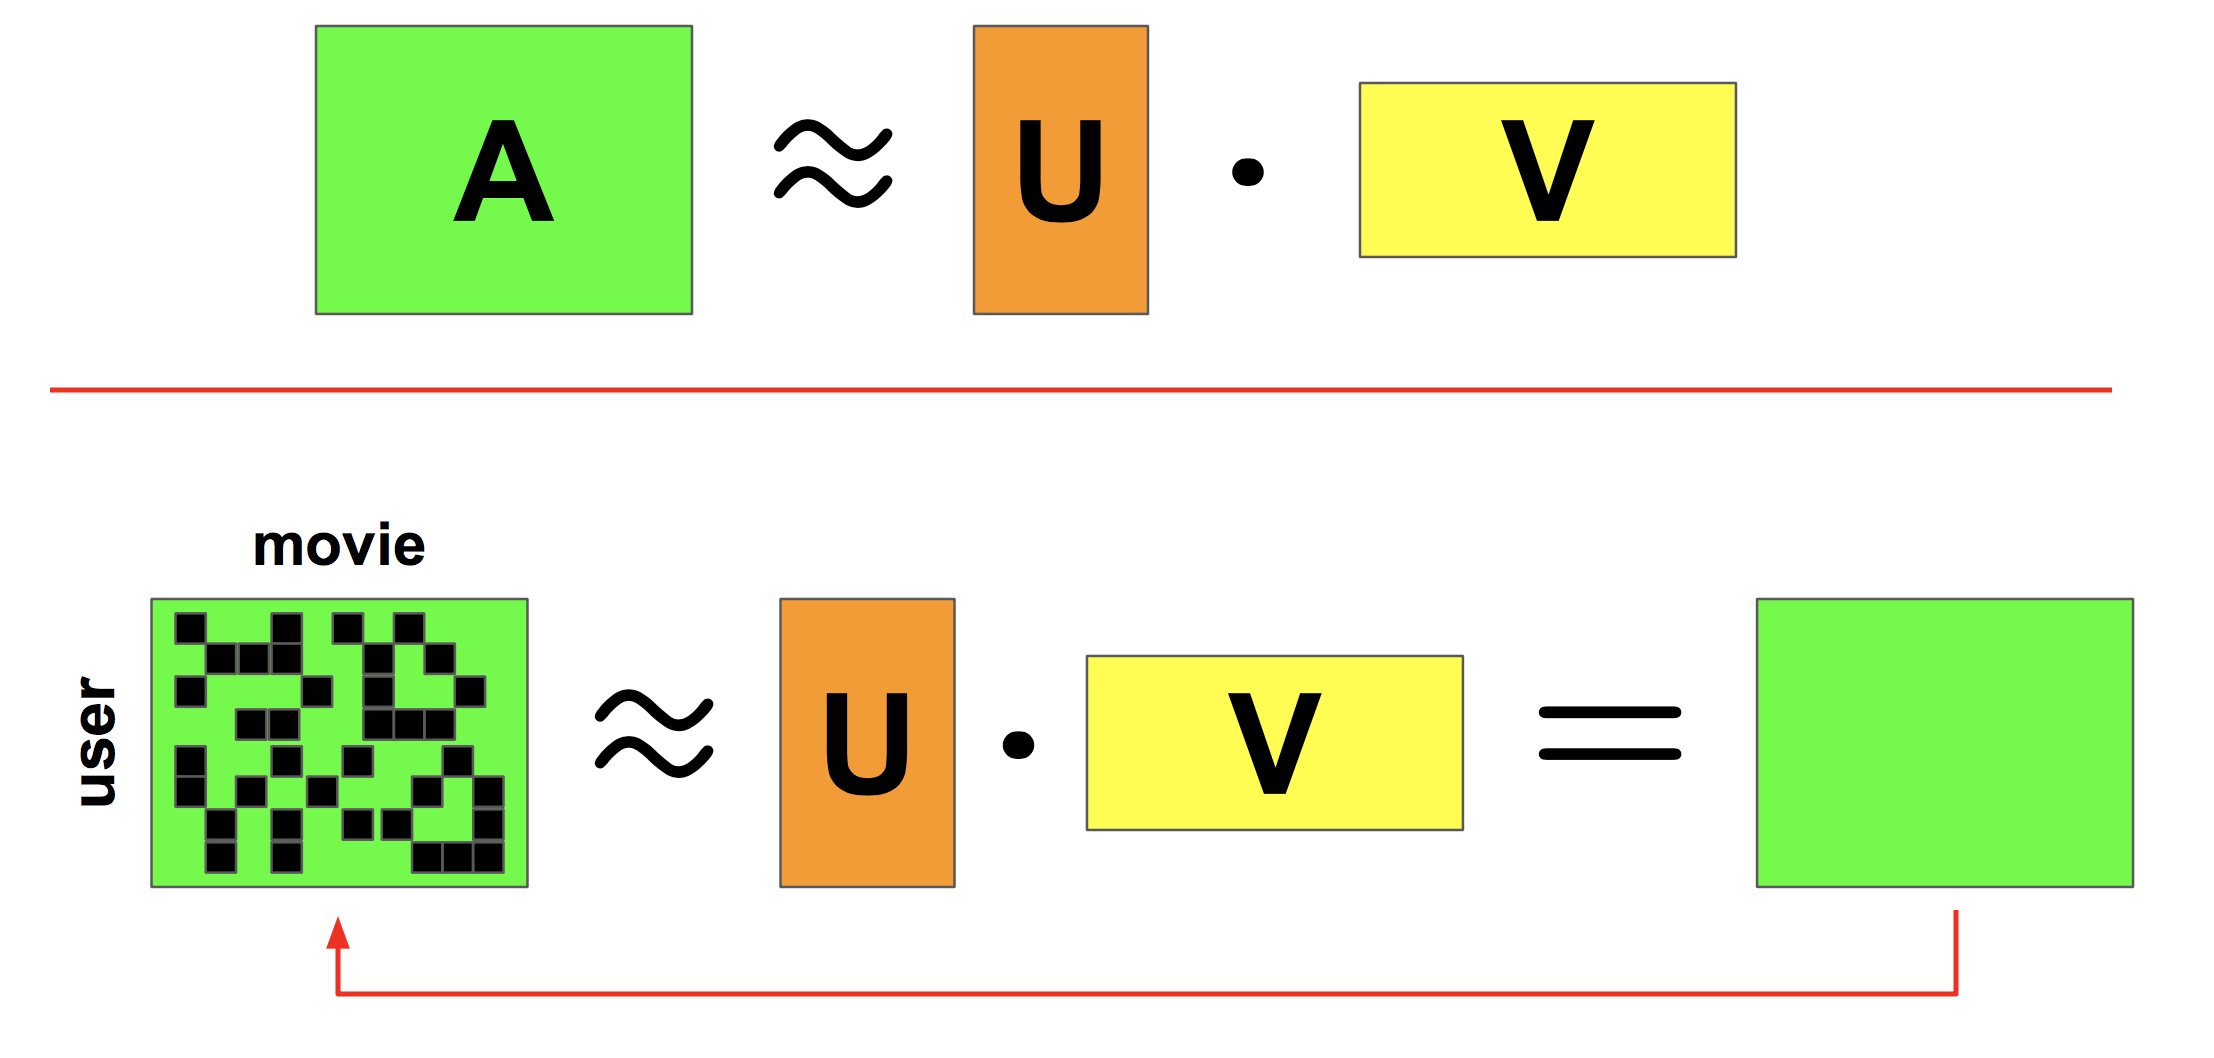

In [18]:
# illustration
illustration.svd

# Import Data

In [9]:
# import data
df = pd.read_csv('data/collaborative_filtering.csv')
df.head()

,userId,movie,rating
0,1,One Flew Over the Cuckoo's Nest (1975),5
1,1,James and the Giant Peach (1996),3
2,1,My Fair Lady (1964),3
3,1,Erin Brockovich (2000),4
4,1,"Bug's Life, A (1998)",5


In [10]:
df.tail()

,userId,movie,rating
1000204,6040,Weekend at Bernie's (1989),1
1000205,6040,"Crying Game, The (1992)",5
1000206,6040,Welcome to the Dollhouse (1995),5
1000207,6040,Sophie's Choice (1982),4
1000208,6040,E.T. the Extra-Terrestrial (1982),4


In [11]:
# df shape
df.shape

(1000209, 3)

In [13]:
# df nunique
df.userId.nunique()

6040

# Training

In [26]:
# import package
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [27]:
# assign
data = Dataset.load_from_df(df, Reader())
trainset = data.build_full_trainset()

In [28]:
# model
model = SVD()
model.fit(trainset)

In [29]:
# predict
model.predict(1, "My Fair Lady (1964)")

Prediction(uid=1, iid='My Fair Lady (1964)', r_ui=None, est=4.088439659472428, details={'was_impossible': False})

# Rating predictions for Unwatched Movies

In [30]:
# sample user
user_id = 1

# All Movies

In [31]:
all_movies = df.movie.unique()
all_movies

array(["One Flew Over the Cuckoo's Nest (1975)",
       'James and the Giant Peach (1996)', 'My Fair Lady (1964)', ...,
       'White Boys (1999)', 'One Little Indian (1973)',
       'Five Wives, Three Secretaries and Me (1998)'], dtype=object)

# Movies that have been watched by user 1

In [32]:
# watched movies
watched = df[df.userId == 1].movie
watched.head()

0    One Flew Over the Cuckoo's Nest (1975)
1          James and the Giant Peach (1996)
2                       My Fair Lady (1964)
3                    Erin Brockovich (2000)
4                      Bug's Life, A (1998)
Name: movie, dtype: object

## Movies that have not been watched by user 1

In [33]:
# not watched
not_watched = [movie for movie in all_movies if movie is not watched]
not_watched

["One Flew Over the Cuckoo's Nest (1975)",
 'James and the Giant Peach (1996)',
 'My Fair Lady (1964)',
 'Erin Brockovich (2000)',
 "Bug's Life, A (1998)",
 'Princess Bride, The (1987)',
 'Ben-Hur (1959)',
 'Christmas Story, A (1983)',
 'Snow White and the Seven Dwarfs (1937)',
 'Wizard of Oz, The (1939)',
 'Beauty and the Beast (1991)',
 'Gigi (1958)',
 'Miracle on 34th Street (1947)',
 "Ferris Bueller's Day Off (1986)",
 'Sound of Music, The (1965)',
 'Airplane! (1980)',
 'Tarzan (1999)',
 'Bambi (1942)',
 'Awakenings (1990)',
 'Big (1988)',
 'Pleasantville (1998)',
 'Wallace & Gromit: The Best of Aardman Animation (1996)',
 'Back to the Future (1985)',
 "Schindler's List (1993)",
 'Meet Joe Black (1998)',
 'Pocahontas (1995)',
 'E.T. the Extra-Terrestrial (1982)',
 'Titanic (1997)',
 'Ponette (1996)',
 'Close Shave, A (1995)',
 'Antz (1998)',
 'Girl, Interrupted (1999)',
 'Hercules (1997)',
 'Aladdin (1992)',
 'Mulan (1998)',
 'Hunchback of Notre Dame, The (1996)',
 'Last Days of Di

# Rating predictions for unwatched movies

In [34]:
# predict
score = [model.predict(user_id, movie).est for movie in not_watched]
score

[4.658548441625688,
 3.5430127767309565,
 4.088439659472428,
 4.311402953520938,
 4.1691334300726846,
 3.9916636212073304,
 4.561876468947946,
 4.256105829166798,
 4.119270327013899,
 4.442454006048409,
 4.371683512743723,
 4.000742093407233,
 4.173888992130505,
 4.176026444989219,
 4.528915349982625,
 4.224546738980298,
 3.8632661603239082,
 4.196011793786711,
 4.08980687963591,
 4.149272127818741,
 3.863809380061311,
 4.199244117904952,
 4.431631184974893,
 4.818518349919323,
 3.4692061355927826,
 3.823464892914822,
 4.456459760520024,
 4.190742707908487,
 4.330313058815771,
 4.428402322803308,
 3.524683494136381,
 3.7790103868015366,
 3.733041992637645,
 4.359500365724378,
 4.199627936622683,
 3.6031210198625936,
 3.6521699538668653,
 4.30320265405828,
 4.380324057352427,
 4.536717673287513,
 4.4344877365955755,
 4.606718151957311,
 4.2344298871821335,
 3.963992503120383,
 4.473292369244294,
 4.412486773442712,
 4.0108933537141045,
 4.562764813210054,
 4.553504847933162,
 3.91580640

# ML Engineering: sum them all up

In [35]:
# wrap into class
class RecommenderSystem:
    def __init__(self, data):
        self.df = pd.read_csv(data)
        self.all_movies = self.df.movie.unique()
        self.model = None
        
    def fit(self):
        data = Dataset.load_from_df(self.df, Reader())
        trainset = data.build_full_trainset()
        
        self.model = SVD()
        self.model.fit(trainset)
        
    def recommend(self,user_id, topk=10):
        watched = self.df[self.df.userId == user_id].movie
        not_watched = [movie for movie in self.all_movies if movie is not watched]
        score = [self.model.predict(user_id, movie).est for movie in not_watched]
        
        result = pd.DataFrame({"movie": not_watched, "pred_score": score})
        result.sort_values("pred_score", ascending=False, inplace=True)
        return result.head(topk)

In [36]:
# test class
recsys = RecommenderSystem("data/collaborative_filtering.csv")
recsys.fit()

In [37]:
# movie recommendation
recsys.recommend(user_id=1)

,movie,pred_score
693,It's a Wonderful Life (1946),4.924845
2617,Sanjuro (1962),4.903393
23,Schindler's List (1993),4.802108
171,Forrest Gump (1994),4.797532
153,Gone with the Wind (1939),4.786729
7,"Christmas Story, A (1983)",4.778118
669,"Godfather, The (1972)",4.771869
236,"Bridge on the River Kwai, The (1957)",4.766809
2626,"World of Apu, The (Apur Sansar) (1959)",4.763165
770,"Sting, The (1973)",4.745619
